# SciPy

| Subpackage  | Description                                            |
| ----------- | ------------------------------------------------------ |
| cluster     | Clustering algorithms                                  |
| constants   | Physical and mathematical constants                    |
| fftpack     | Fast Fourier Transform routines                        |
| integrate   | Integration and ordinary differential equation solvers |
| interpolate | Interpolation and smoothing splines                    |
| io          | Input and Output                                       |
| linalg      | Linear algebra                                         |
| ndimage     | N-dimensional image processing                         |
| odr         | Orthogonal distance regression                         |
| optimize    | Optimization and root-finding routines                 |
| signal      | Signal processing                                      |
| sparse      | Sparse matrices and associated routines                |
| spatial     | Spatial data structures and algorithms                 |
| special     | Special functions                                      |
| stats       | Statistical distributions and functions                |


In [1]:
import numpy as np


np.random.seed(0)
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
def plot_rv(
    xk: np.ndarray,
    yk: np.ndarray,
) -> np.ndarray:
    _, ax = plt.subplots(1, 1)
    ax.scatter(xk, yk, marker="o", s=5)
    ax.vlines(xk, 0, yk)
    plt.show()

In [3]:
x = np.random.randn(1_000_000)

print(x[:10])

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


|              | $\mathcal {N}$(0, 1) |     |     |
| ------------ | -------------------- | --- | --- |
| Variance     | $1$                  |     |     |
| Skewness     | $0$                  |     |     |
| Ex. kurtosis | $0$                  |     |     |


In [4]:
print(f"var: {np.var(x)}")
print(f"skew: {scipy.stats.skew(x)}")
print(f"kurtosis: {scipy.stats.kurtosis(x)}")

var: 0.9998426582229105
skew: -0.001361127398332973
kurtosis: -0.0001276636003777476


## RV Continuous

```python
class scipy.stats.rv_continuous(
    momtype=1,
    a=None,
    b=None,
    xtol=1e-14,
    seed=None
)`
```

A generic continuous random variable class meant for subclassing.

rv_continuous is a base class to construct specific distribution classes and instances for continuous random variables. It cannot be used directly as a distribution.

| rvs     | Random variates of given type.                                                                    |
| ------- | ------------------------------------------------------------------------------------------------- |
| pdf     | Probability density function at x of the given RV.                                                |
| logpdf  | Log of the probability density function at x of the given RV.                                     |
| cdf     | Cumulative distribution function of the given RV.                                                 |
| logcdf  | Log of the cumulative distribution function at x of the given RV.                                 |
| entropy | Differential entropy of the RV.                                                                   |
| expect  | Calculate expected value of a function with respect to the distribution by numerical integration. |
| median  | Median of the distribution.                                                                       |
| mean    | Mean of the distribution.                                                                         |
| std     | Standard deviation of the distribution.                                                           |
| var     | Variance of the distribution.                                                                     |


In [5]:
class GaussianGen(scipy.stats.rv_continuous):
    """Gaussian distribution"""

    def _pdf(self, x: np.ndarray) -> np.ndarray:
        return np.exp(-(x**2) / 2.0) / np.sqrt(2.0 * np.pi)


gaussian = GaussianGen(name="gaussian")

In [6]:
xi = np.linspace(-5.0, 5.0, 1000)

print(xi)

[-5.         -4.98998999 -4.97997998 -4.96996997 -4.95995996 -4.94994995
 -4.93993994 -4.92992993 -4.91991992 -4.90990991 -4.8998999  -4.88988989
 -4.87987988 -4.86986987 -4.85985986 -4.84984985 -4.83983984 -4.82982983
 -4.81981982 -4.80980981 -4.7997998  -4.78978979 -4.77977978 -4.76976977
 -4.75975976 -4.74974975 -4.73973974 -4.72972973 -4.71971972 -4.70970971
 -4.6996997  -4.68968969 -4.67967968 -4.66966967 -4.65965966 -4.64964965
 -4.63963964 -4.62962963 -4.61961962 -4.60960961 -4.5995996  -4.58958959
 -4.57957958 -4.56956957 -4.55955956 -4.54954955 -4.53953954 -4.52952953
 -4.51951952 -4.50950951 -4.4994995  -4.48948949 -4.47947948 -4.46946947
 -4.45945946 -4.44944945 -4.43943944 -4.42942943 -4.41941942 -4.40940941
 -4.3993994  -4.38938939 -4.37937938 -4.36936937 -4.35935936 -4.34934935
 -4.33933934 -4.32932933 -4.31931932 -4.30930931 -4.2992993  -4.28928929
 -4.27927928 -4.26926927 -4.25925926 -4.24924925 -4.23923924 -4.22922923
 -4.21921922 -4.20920921 -4.1991992  -4.18918919 -4

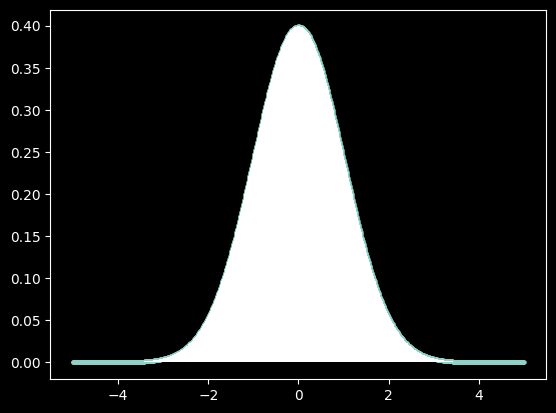

In [7]:
pdf_x = gaussian.pdf(xi)

plot_rv(xi, pdf_x)

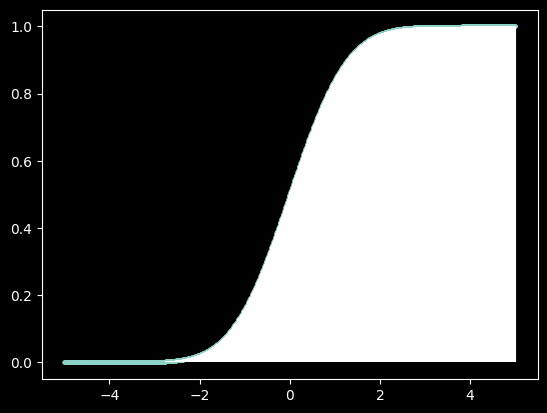

In [8]:
xi = np.linspace(-5.0, 5.0, 1000)
cdf_x = gaussian.cdf(xi)

plot_rv(xi, cdf_x)

In [9]:
print(gaussian.mean())
print(gaussian.var())
print(gaussian.std())
print(gaussian.entropy())

-5.955875168377274e-16
0.9999999993068875
0.9999999996534438
1.4189385332046731


In [10]:
x_sampled = gaussian.rvs(size=10)

print(x_sampled)

[ 0.88426012  0.36929104 -0.71762225  0.90517451  0.30694128 -0.11642505
  0.29216638  0.29496923  0.03615335  1.63617067]


## RV Discrete

A generic discrete random variable class meant for subclassing.

rv_discrete is a base class to construct specific distribution classes and instances for discrete random variables.

| rvs     | Random variates of given type.                            |
| ------- | --------------------------------------------------------- |
| pmf     | Probability mass function at k of the given RV            |
| logpmf  | Log of the probability mass function at k of the given RV |
| cdf     | Cumulative distribution function of the given RV          |
| logcdf  | Log of the cumulative distribution function               |
| entropy | Differential entropy of the RV                            |
| expect  | Calculate expected value                                  |
| median  | Median of the distribution                                |
| mean    | Mean of the distribution                                  |
| std     | Standard deviation of the distribution                    |
| var     | Variance of the distribution                              |


In [11]:
xk = np.arange(20)

In [12]:
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = scipy.stats.rv_discrete(name="custm", values=(xk, pk))

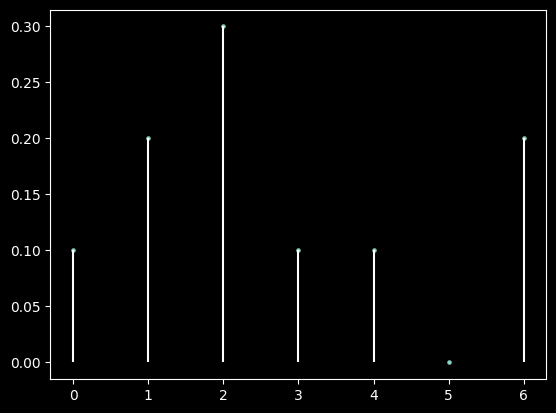

In [13]:
pmf_x = custm.pmf(xk)

plot_rv(xk, pmf_x)

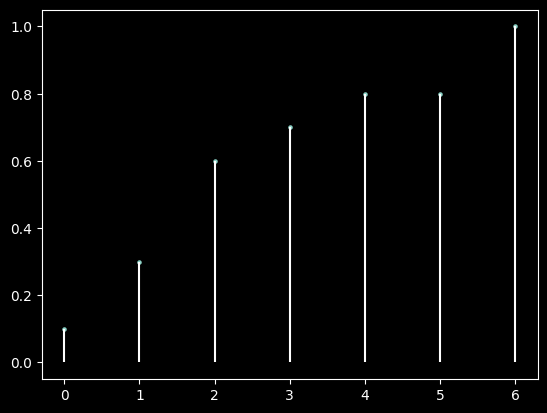

In [14]:
cdf_x = custm.cdf(xk)

plot_rv(xk, cdf_x)

In [15]:
print(custm.mean())
print(custm.var())
print(custm.std())
print(custm.entropy())

2.7
3.8099999999999987
1.9519221295943132
1.6957425341696346


In [16]:
x_sampled = custm.rvs(size=10)

print(x_sampled)

[6 2 6 0 6 2 2 6 2 6]
